In [401]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/house-data.csv')
df.shape

(4600, 11)

In [402]:
df = df[:750]

In [403]:
df.shape

(750, 11)

In [404]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
yr_built       0
statezip       0
dtype: int64

In [405]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,statezip
count,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,5.526580e+05,3.430667,2.146333,2128.301333,15850.340000,1.488667,0.008000,0.180000,3.453333,1970.378667,98077.621333
std,3.411469e+05,0.922855,0.794362,996.874294,34825.447931,0.551311,0.089144,0.650254,0.663634,29.400836,52.520737
min,9.000000e+04,1.000000,0.750000,650.000000,681.000000,1.000000,0.000000,0.000000,1.000000,1900.000000,98001.000000
25%,3.304875e+05,3.000000,1.750000,1440.000000,5258.250000,1.000000,0.000000,0.000000,3.000000,1952.000000,98033.000000
50%,4.867925e+05,3.000000,2.250000,1960.000000,7735.000000,1.000000,0.000000,0.000000,3.000000,1974.000000,98071.000000
75%,6.500000e+05,4.000000,2.500000,2600.000000,11135.250000,2.000000,0.000000,0.000000,4.000000,1995.000000,98117.000000
max,3.200000e+06,9.000000,8.000000,13540.000000,435600.000000,3.000000,1.000000,4.000000,5.000000,2014.000000,98288.000000


In [406]:
final_dataset=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','yr_built','statezip']]

In [407]:
final_dataset['Current Year']=2022

In [408]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['yr_built']

In [409]:
final_dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,statezip,Current Year,no_year
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1955,98133,2022,67
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,1921,98119,2022,101
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1966,98042,2022,56
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1963,98008,2022,59
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1976,98052,2022,46


In [410]:
final_dataset.drop(['yr_built'],axis=1,inplace=True)

In [411]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [412]:
final_dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,statezip,Current Year,no_year
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,98133,2022,67
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,98119,2022,101
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,98042,2022,56
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,98008,2022,59
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,98052,2022,46


In [413]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [414]:
final_dataset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,statezip,no_year
price,1.000000,0.409726,0.515246,0.698935,0.135543,0.287100,0.236635,0.402862,0.057622,-0.047433,0.018498
bedrooms,0.409726,1.000000,0.567742,0.631380,0.085159,0.159183,-0.041936,0.113156,0.047030,-0.139538,-0.085703
bathrooms,0.515246,0.567742,1.000000,0.766187,0.187082,0.460323,0.016441,0.166703,-0.129172,-0.197751,-0.445937
sqft_living,0.698935,0.631380,0.766187,1.000000,0.327232,0.326311,0.061977,0.279778,-0.057481,-0.194115,-0.257884
sqft_lot,0.135543,0.085159,0.187082,0.327232,1.000000,0.007752,0.010062,0.069308,-0.074117,-0.157048,-0.089033
floors,0.287100,0.159183,0.460323,0.326311,0.007752,1.000000,0.029014,0.003836,-0.270573,-0.031941,-0.439578
waterfront,0.236635,-0.041936,0.016441,0.061977,0.010062,0.029014,1.000000,0.412746,0.006319,0.044563,0.064834
view,0.402862,0.113156,0.166703,0.279778,0.069308,0.003836,0.412746,1.000000,0.036508,0.074282,0.093239
condition,0.057622,0.047030,-0.129172,-0.057481,-0.074117,-0.270573,0.006319,0.036508,1.000000,0.036112,0.406442
statezip,-0.047433,-0.139538,-0.197751,-0.194115,-0.157048,-0.031941,0.044563,0.074282,0.036112,1.000000,0.360627


In [415]:
import seaborn as sns

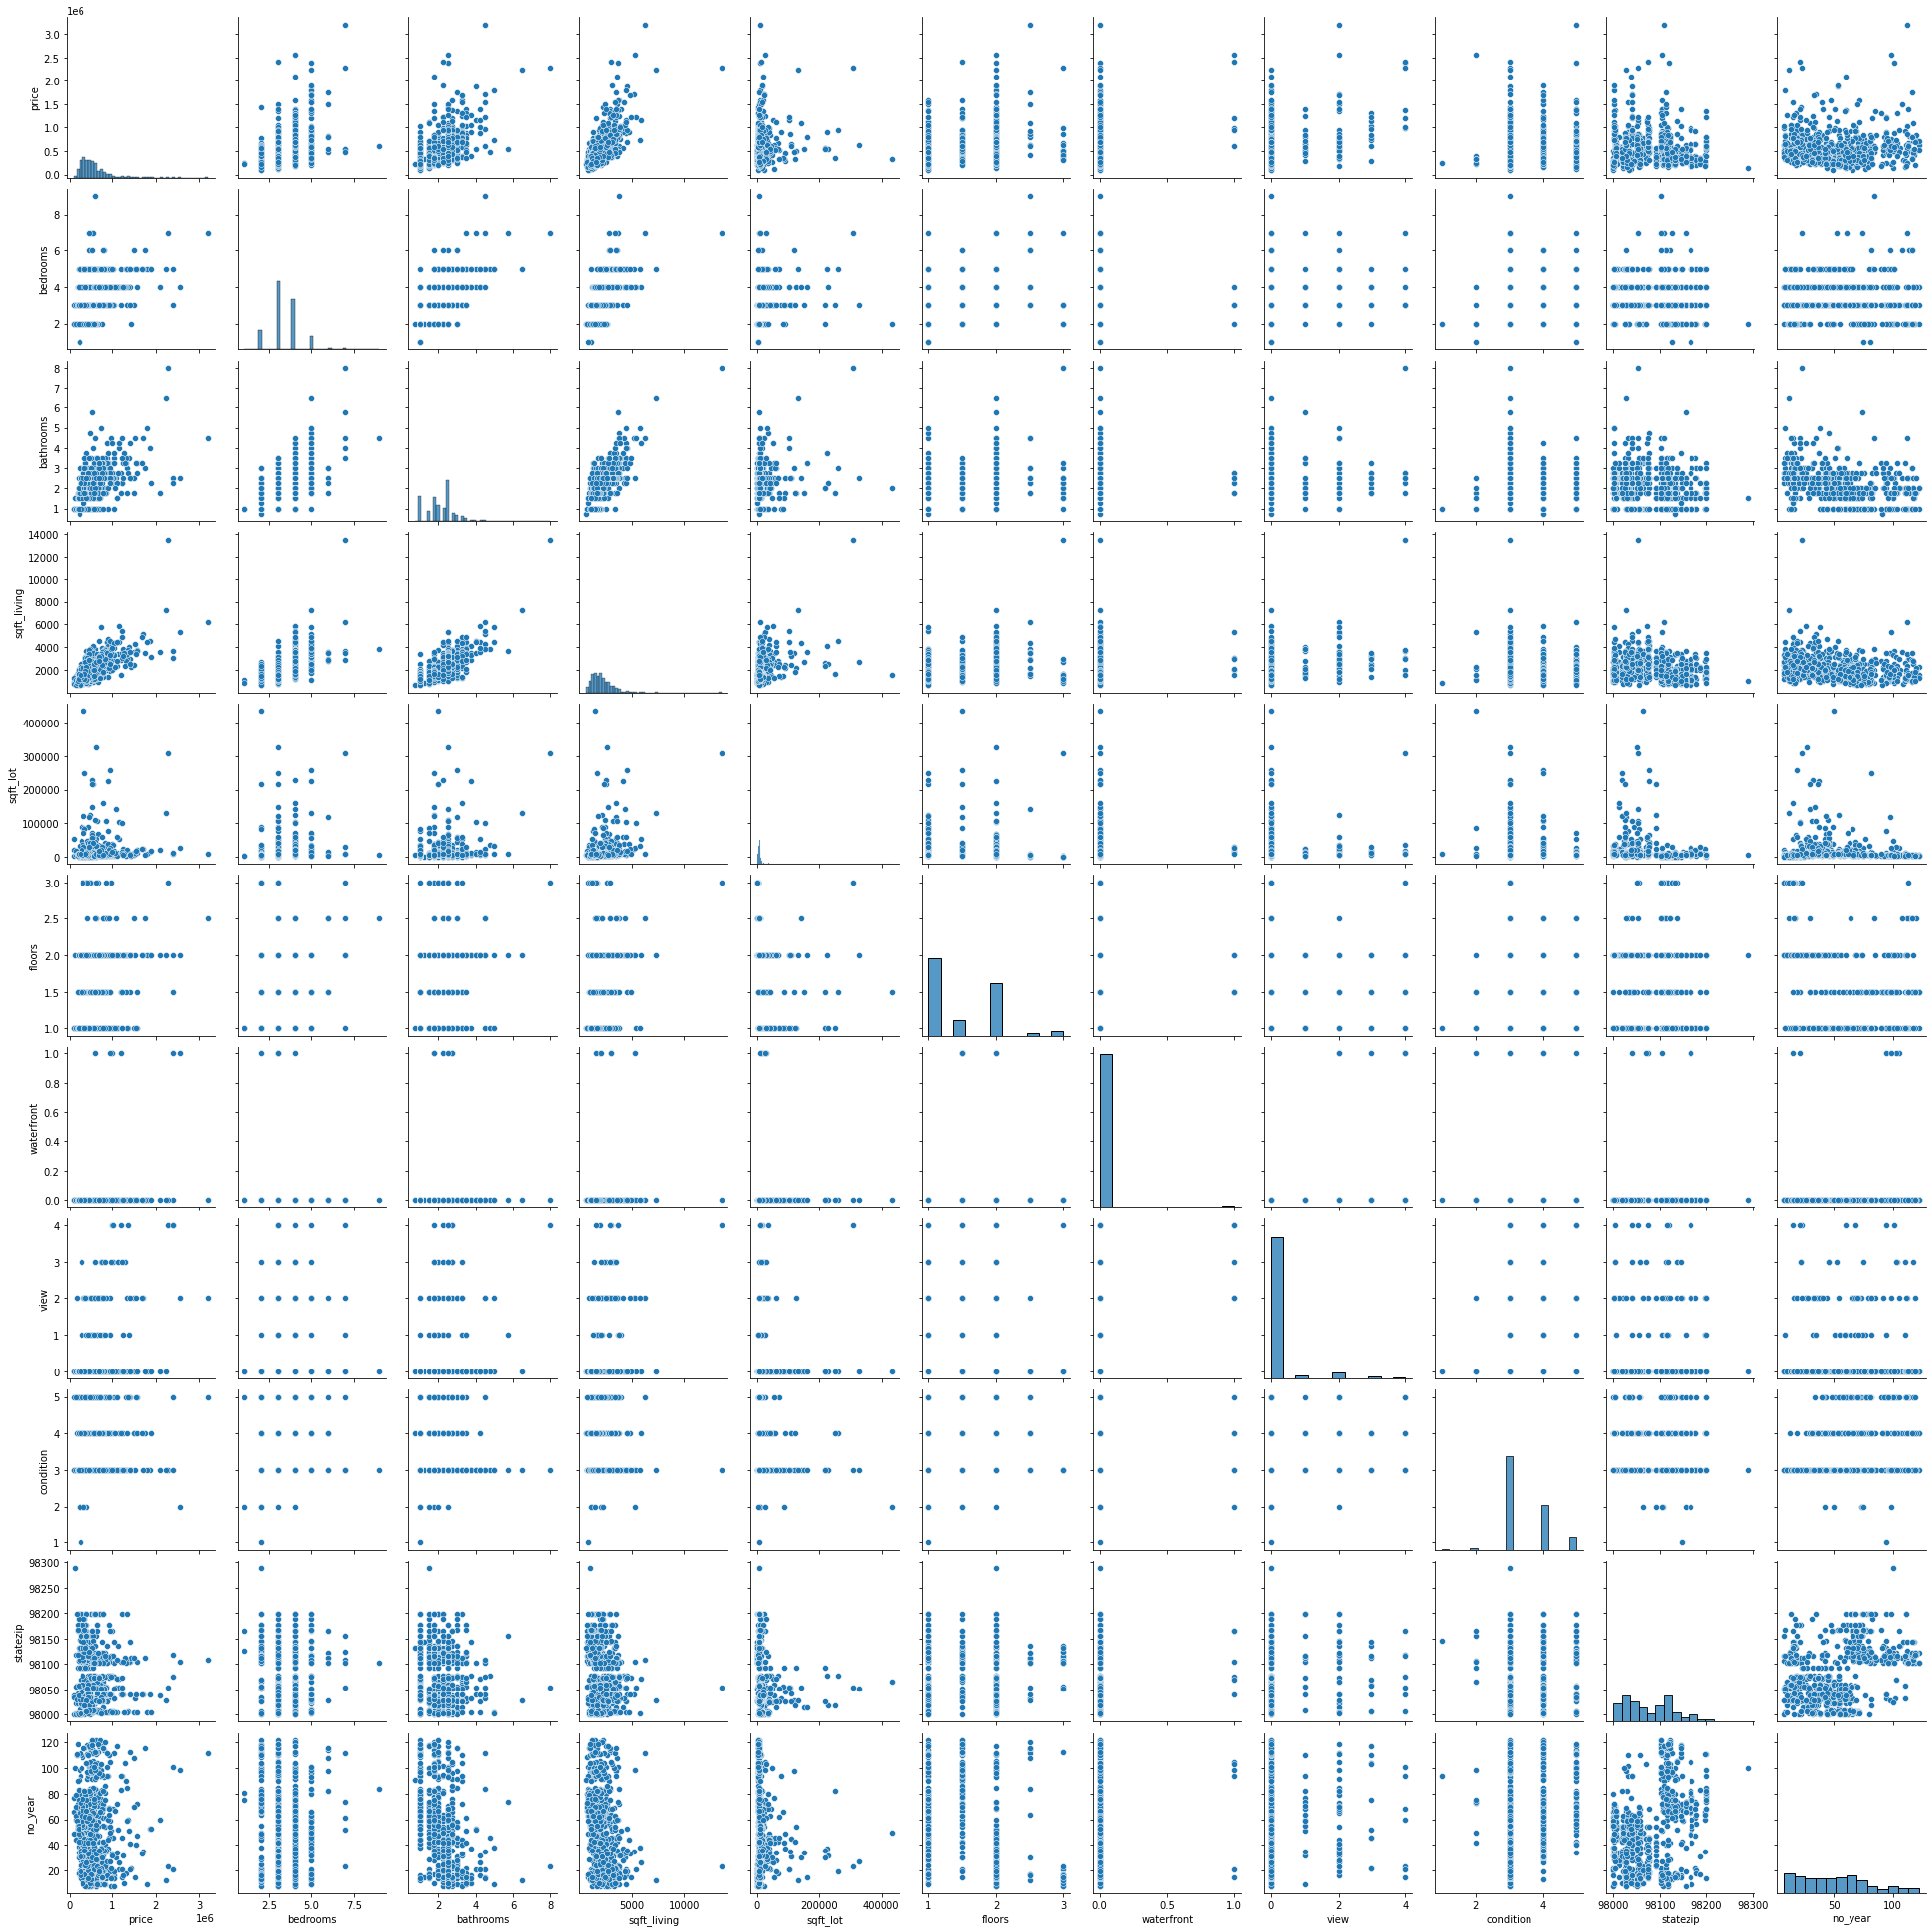

In [416]:
sns.pairplot(final_dataset)

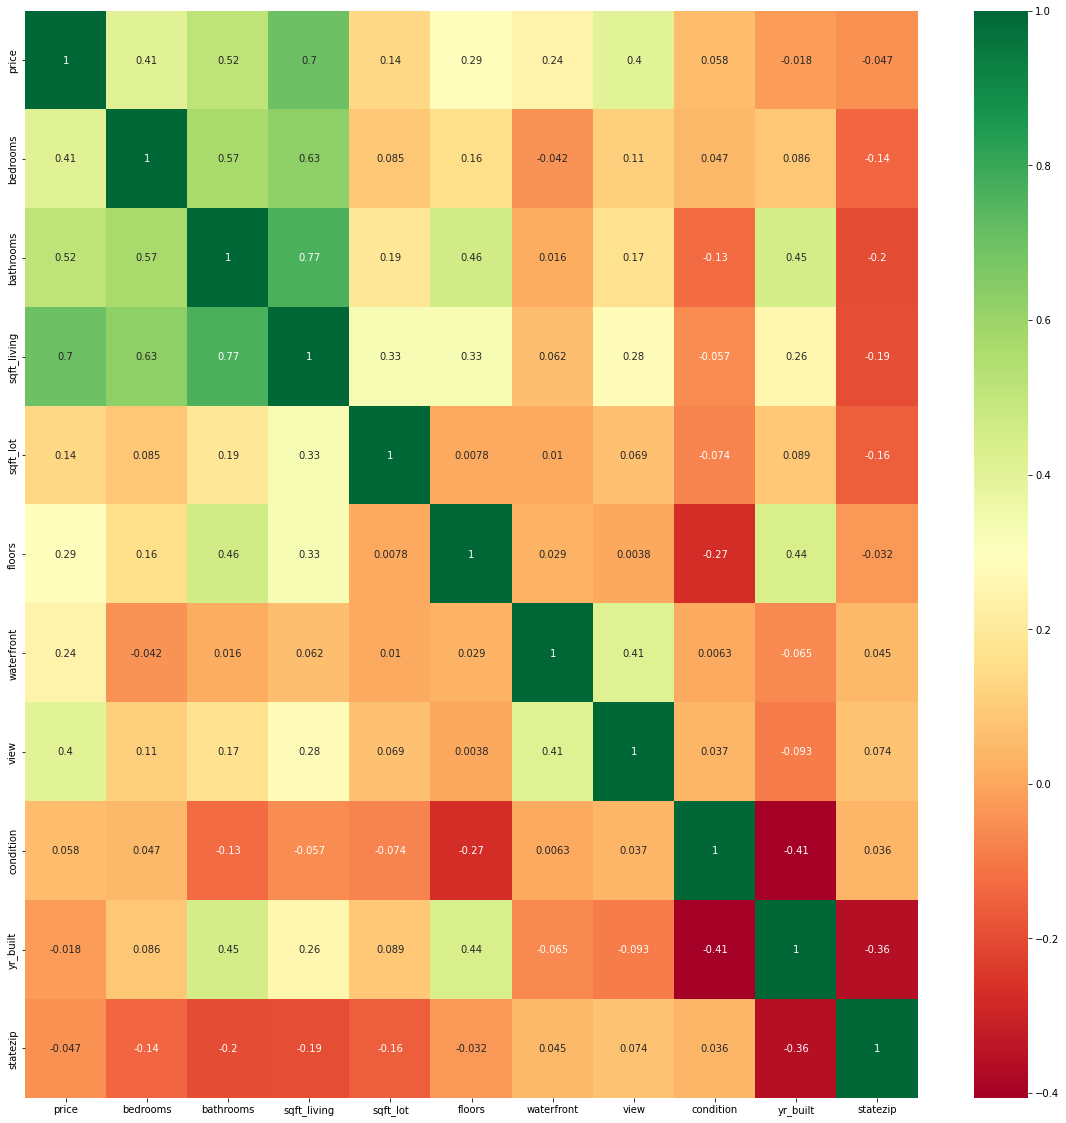

In [417]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [418]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [419]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,statezip,no_year
0,3,1.50,1340,7912,1.5,0,0,3,98133,67
1,5,2.50,3650,9050,2.0,0,4,5,98119,101
2,3,2.00,1930,11947,1.0,0,0,4,98042,56
3,3,2.25,2000,8030,1.0,0,0,4,98008,59
4,4,2.50,1940,10500,1.0,0,0,4,98052,46


In [420]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [421]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [422]:
print(model.feature_importances_)

[0.0689192  0.10171129 0.38937465 0.04247899 0.05290316 0.01663942
 0.11266901 0.04645438 0.0837598  0.08509011]


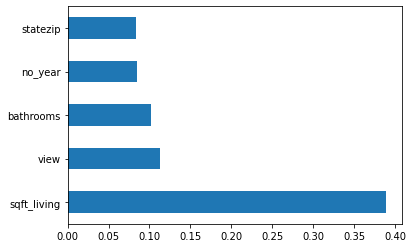

In [423]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [424]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [425]:
X_train.shape

(600, 10)

In [427]:
from sklearn.ensemble import RandomForestRegressor

In [428]:
rf_random=RandomForestRegressor()

In [429]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]


In [430]:
from sklearn.model_selection import RandomizedSearchCV

In [431]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 8)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [432]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 24, 30, 37, 43, 50], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [433]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [434]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [435]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   1.6s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   1.6s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 11, 17, 24, 30, 37, 43,
                                                      50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42, scorin

In [436]:
predictions=rf_random.predict(X_test)

In [437]:
predictions

array([ 349724.92201523,  343528.46668599,  414140.94963533,
        451302.26177086,  427526.35704018,  635345.02089569,
        317756.54730817,  787261.91371748,  896657.98602077,
        695460.11388889,  748899.87075067,  352807.82480056,
        321186.96393939,  289225.3765811 ,  628977.65518481,
        395188.31024299,  363515.13259271,  467381.00304169,
        508995.77413693,  306324.4422203 ,  243284.43270194,
        388476.74016723, 1064651.22824067,  406942.1215873 ,
        440136.53218829,  566041.4224563 ,  271480.47708666,
        459689.26621877,  958480.82740484,  430834.49611018,
        376372.98763322,  405507.49636215,  338430.82542491,
        349878.09694944,  305625.53121496,  406974.5765502 ,
        366639.1706393 ,  329879.01560869,  281980.00865329,
        517835.15019948,  497140.72844795,  374531.54942873,
       1034950.01991558, 1398950.13940126,  355079.20414348,
        386533.86229592,  608029.04566893,  703388.9592585 ,
        269757.97927146,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


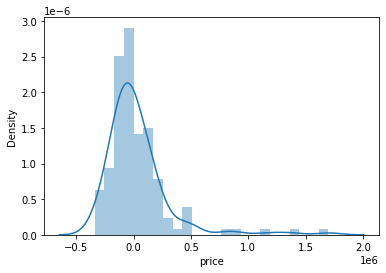

In [438]:
import seaborn as sns
sns.distplot(y_test-predictions)

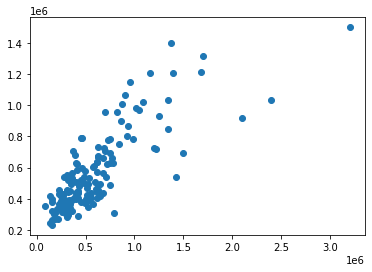

In [439]:
plt.scatter(y_test,predictions)

In [440]:
rf_random.best_score_

-43449106563.205

In [441]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 166450.49995936314
MSE: 78269677686.75217
RMSE: 279767.184792556


In [443]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model_y_5.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)